## TOC:

*[01. Importing libraries]

*[02. Importing data]

*[03. Creating Bar Charts]

*[04. Histograms and Scatterplots]

*[05. Sampling Data]

# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
#define path

path = r'C:\Users\Jonathan\08-2023 Instacart Basket Analysis'

In [3]:
#importing datasets

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

# 03. Creating Bar Charts

<Axes: >

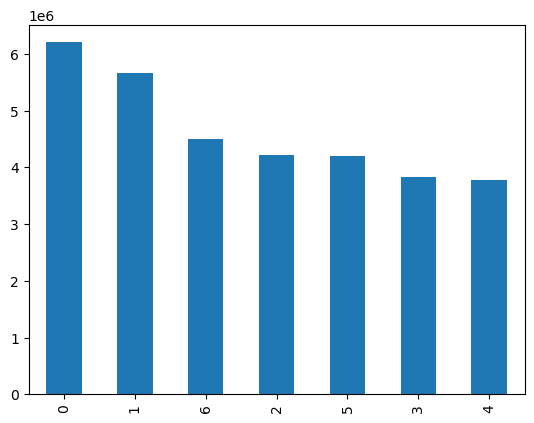

In [4]:
#creating a bar chart

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: >

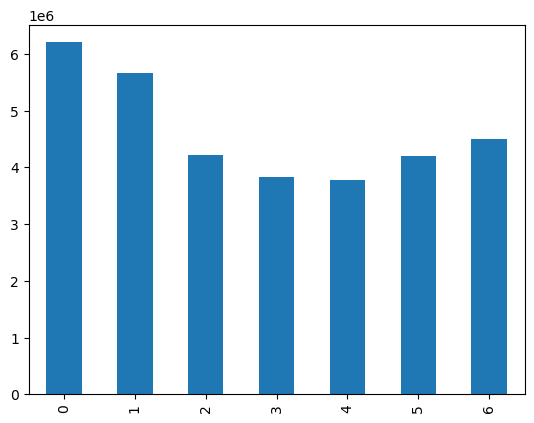

In [5]:
#sorting bar chart

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

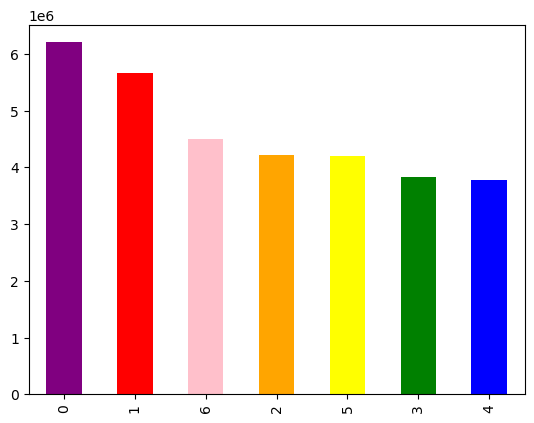

In [6]:
#adding color to bar chart

bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
#exporting bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 04. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

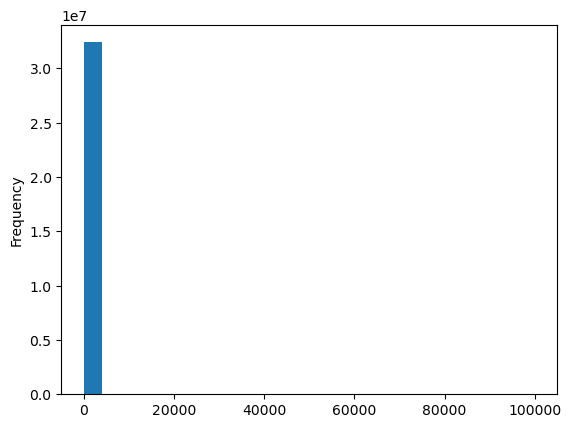

In [8]:
#create a histogram of "prices" column

ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

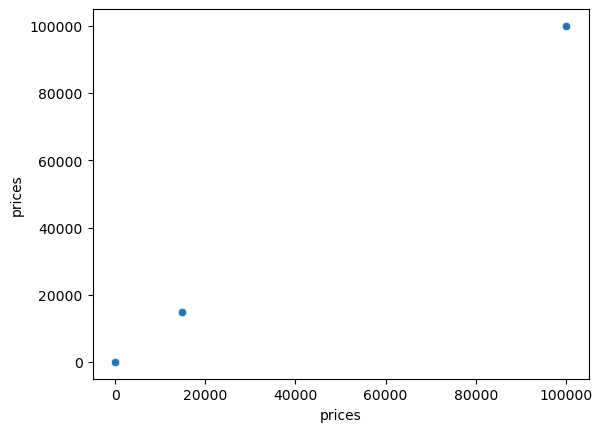

In [9]:
#making a scatterplot 

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
#checking abnormal values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spender_type,frequency,frequency_type
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regular busy,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regular busy,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regular busy,Regular busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regular busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regular busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regular busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
#removing abnormal values

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
#checking to see if abnormal values were removed

ords_prods_merge['prices'].max()

25.0

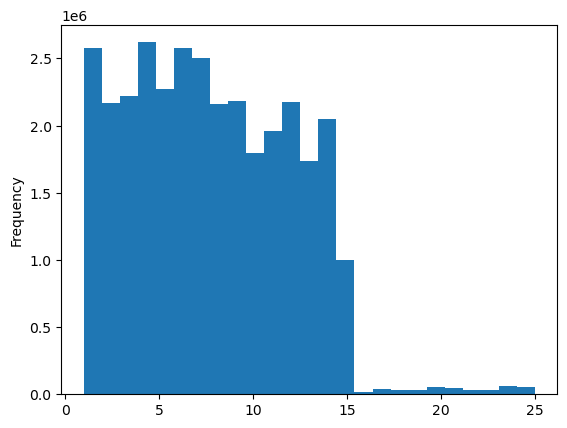

In [16]:
#creating histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

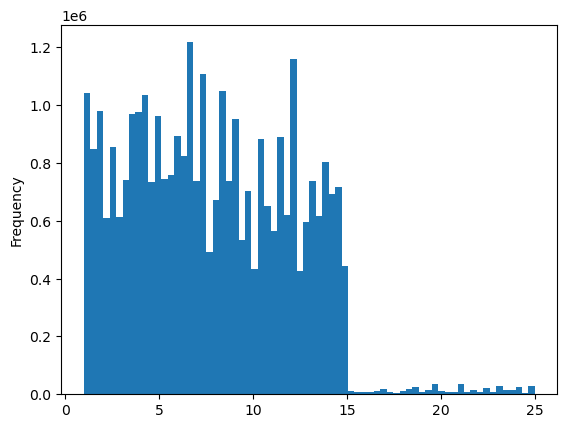

In [17]:
#creating a historgram with thinner bins

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
#exporting visualization

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_histogram.png'))

# 05. Sampling Data

In [19]:
#Creating a list of True/False values to test np.random.rant() <= 0.7 using random seed 4

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
#Defining 70% of sample in dataframe big

big = ords_prods_merge[dev]

In [21]:
#Defining 30% of sample in dataframe small

small = ords_prods_merge[~dev]

In [22]:
#checking if the samples add up to the whole dataset

len(ords_prods_merge)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
df_2 = small[['order_day_of_week', 'prices']]

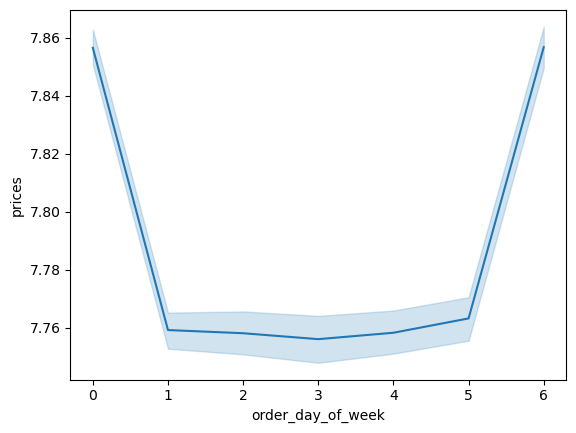

In [25]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')